In [1]:
import os

os.chdir("../")

In [2]:
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = '/home/jovyan/data/ml-100k/data.csv'

data = pl.read_csv(data_path)

In [4]:
data.head(5)

shape: (5, 23)
┌─────────┬──────────┬────────┬───────────┬───┬────────┬──────────┬─────┬─────────┐
│ user_id ┆ movie_id ┆ rating ┆ timestamp ┆ … ┆ Sci-Fi ┆ Thriller ┆ War ┆ Western │
│ ---     ┆ ---      ┆ ---    ┆ ---       ┆   ┆ ---    ┆ ---      ┆ --- ┆ ---     │
│ i64     ┆ i64      ┆ i64    ┆ i64       ┆   ┆ i64    ┆ i64      ┆ i64 ┆ i64     │
╞═════════╪══════════╪════════╪═══════════╪═══╪════════╪══════════╪═════╪═════════╡
│ 196     ┆ 242      ┆ 3      ┆ 881250949 ┆ … ┆ 0      ┆ 0        ┆ 0   ┆ 0       │
│ 63      ┆ 242      ┆ 3      ┆ 875747190 ┆ … ┆ 0      ┆ 0        ┆ 0   ┆ 0       │
│ 226     ┆ 242      ┆ 5      ┆ 883888671 ┆ … ┆ 0      ┆ 0        ┆ 0   ┆ 0       │
│ 154     ┆ 242      ┆ 3      ┆ 879138235 ┆ … ┆ 0      ┆ 0        ┆ 0   ┆ 0       │
│ 306     ┆ 242      ┆ 5      ┆ 876503793 ┆ … ┆ 0      ┆ 0        ┆ 0   ┆ 0       │
└─────────┴──────────┴────────┴───────────┴───┴────────┴──────────┴─────┴─────────┘

In [5]:
data.estimated_size("mb")

18.9573974609375

In [6]:
print('Unique users:',data.select(pl.col('user_id').n_unique()))
print('Unique movies:',data.select(pl.col('movie_id').n_unique()))
print('Min rating:',data.select(pl.col('rating').min()))
print('Max rating:',data.select(pl.col('rating').max()))
print('Mean rating:',data.select(pl.col('rating').mean()))

Unique users: shape: (1, 1)
┌─────────┐
│ user_id │
│ ---     │
│ u32     │
╞═════════╡
│ 943     │
└─────────┘
Unique movies: shape: (1, 1)
┌──────────┐
│ movie_id │
│ ---      │
│ u32      │
╞══════════╡
│ 1682     │
└──────────┘
Min rating: shape: (1, 1)
┌────────┐
│ rating │
│ ---    │
│ i64    │
╞════════╡
│ 1      │
└────────┘
Max rating: shape: (1, 1)
┌────────┐
│ rating │
│ ---    │
│ i64    │
╞════════╡
│ 5      │
└────────┘
Mean rating: shape: (1, 1)
┌─────────┐
│ rating  │
│ ---     │
│ f64     │
╞═════════╡
│ 3.52986 │
└─────────┘


In [7]:
rating_count = data.select(pl.col('rating').value_counts()).unnest('rating')

In [8]:
rating_count.to_pandas()

rating  count
0       1   6110
1       4  34174
2       5  21201
3       3  27145
4       2  11370

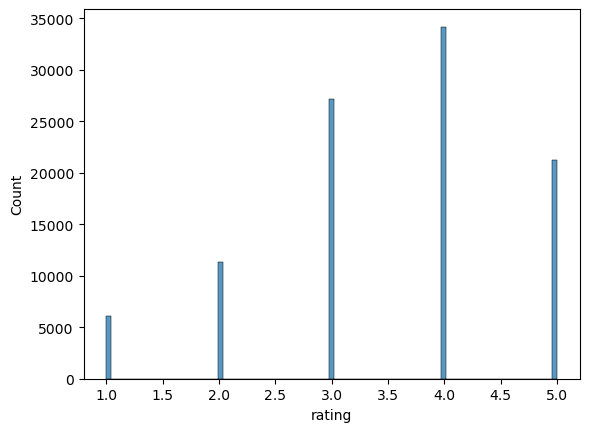

In [9]:
sns.histplot(data = data.to_pandas(),x = 'rating')
plt.show()